### Section 2G-1: County Breakdown
We also want to examine the counties in California where enrollment change may have been greatest during 2020-2021. Similar to what was done for school districts, a new dataframe is created that has enrollment total by county.

In [1]:
#load libraries needed for the notebook
library(dplyr)
library(tidyr)
library(ggplot2)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
#Load in the dataframe from our saved .Rda file
df <- readRDS(file="Group7DataFrame.Rda")

In [3]:
#Create a new dataframe to show total enrollment
county_total <- df %>%
select(COUNTY, SCHOOL, Year, ENR_TOTAL) %>%
group_by(COUNTY, Year)  %>% 
summarize(total_enroll = sum(ENR_TOTAL))

In [4]:
 #Percent change per year for total enrolled is added by county to the county_total dataframe
county_total$percent_change <- ((county_total$total_enroll/lag(county_total$total_enroll)-1)*100)

In [5]:
#Sort the data by percentage change in descending order. Make this into a separate dataframe called "county_total2"
county_total2 <- county_total  %>% arrange(desc(percent_change))

In [6]:
#Because we want to specifically look at the percentage change for counties in 2020 and 2021, filter the data by Year == 2020.
#Save this into a new 2020-specific dataframe.
county_total_2020 <- county_total2  %>% filter(Year == 2020) 

In [7]:
##To better interpret the ranking of the percentage change in 2020, a row number was added as a column value. Display the 
##top and bottom rows as a visual check.
county_total_2020$rank_2020 <- seq.int(nrow(county_total_2020))
head(county_total_2020)
tail(county_total_2020)

COUNTY,Year,total_enroll,percent_change,rank_2020
<fct>,<fct>,<int>,<dbl>,<int>
El Dorado,2020,31126,10.293753,1
Glenn,2020,6042,6.523272,2
Sierra,2020,432,6.142506,3
Kern,2020,198910,3.358864,4
Lake,2020,9850,2.146635,5
Tehama,2020,11109,1.786696,6


COUNTY,Year,total_enroll,percent_change,rank_2020
<fct>,<fct>,<int>,<dbl>,<int>
Santa Clara,2020,263449,-1.412673,53
Los Angeles,2020,1436522,-1.877047,54
Sonoma,2020,68194,-2.208392,55
Butte,2020,30034,-5.707648,56
Sutter,2020,23308,-6.065369,57
Alpine,2020,70,-11.392405,58


In [8]:
##Because we're primarily interested in the counties where the most enrollment change occured, counties in 2020 were filtered to
##display only the top and bottom ten counties. This data was then saved into a new dataframe called "top_bottom_county_2020"
top_bottom_county_2020 <- county_total_2020  %>%
filter(rank_2020 < 11 | rank_2020 > 48)
top_bottom_county_2020

COUNTY,Year,total_enroll,percent_change,rank_2020
<fct>,<fct>,<int>,<dbl>,<int>
El Dorado,2020,31126,10.2937529,1
Glenn,2020,6042,6.5232722,2
Sierra,2020,432,6.1425061,3
Kern,2020,198910,3.3588643,4
Lake,2020,9850,2.1466349,5
Tehama,2020,11109,1.7866960,6
Nevada,2020,11525,1.7210944,7
Yolo,2020,30569,1.6087751,8
Del Norte,2020,4327,1.4299109,9


In [9]:
#Because we want to specifically look at the percentage change for counties in 2020 and 2021, filter the data by Year == 2021.
#Save this into a new 2021-specific dataframe.
county_total_2021 <- county_total2  %>% filter(Year == 2021)

In [10]:
##To better interpret the ranking of the percentage change in 2021, a row number was added as a column value. Display the 
##top and bottom rows as a visual check.
county_total_2021$rank_2021 <- seq.int(nrow(county_total_2021))
head(county_total_2021)
tail(county_total_2021)

COUNTY,Year,total_enroll,percent_change,rank_2021
<fct>,<fct>,<int>,<dbl>,<int>
Alpine,2021,73,4.2857143,1
Sutter,2021,23695,1.6603741,2
Lassen,2021,3837,0.6822356,3
Glenn,2021,6073,0.5130751,4
Trinity,2021,1585,0.3799873,5
San Joaquin,2021,151167,-0.7765015,6


COUNTY,Year,total_enroll,percent_change,rank_2021
<fct>,<fct>,<int>,<dbl>,<int>
Tuolumne,2021,5685,-5.955335,53
Amador,2021,3914,-6.048968,54
Plumas,2021,2055,-7.390717,55
Sierra,2021,395,-8.564815,56
Inyo,2021,4059,-9.316354,57
Mono,2021,1722,-11.053719,58


In [11]:
##Because we're primarily interested in the counties where the most enrollment change occured, counties in 2021 were filtered
##to display only the top and bottom ten counties. This data was then saved into a new dataframe called 
##"top_bottom_county_2021"
top_bottom_county_2021 <- county_total_2021  %>%
filter(rank_2021 < 6 | rank_2021 > 53)
top_bottom_county_2021 

COUNTY,Year,total_enroll,percent_change,rank_2021
<fct>,<fct>,<int>,<dbl>,<int>
Alpine,2021,73,4.2857143,1
Sutter,2021,23695,1.6603741,2
Lassen,2021,3837,0.6822356,3
Glenn,2021,6073,0.5130751,4
Trinity,2021,1585,0.3799873,5
Amador,2021,3914,-6.0489678,54
Plumas,2021,2055,-7.3907165,55
Sierra,2021,395,-8.5648148,56
Inyo,2021,4059,-9.3163539,57


### Section 2G-2: County Breakdown by Demographic
Additional breakdown of county, but by demographic

In [12]:
#filter for the top 3 counties in terms of % change
county_top3_21 <- df %>%
select(COUNTY, ETHNIC, Year, ENR_TOTAL) %>%
group_by(COUNTY, ETHNIC, Year) %>%
summarize(Total_Enroll = sum(ENR_TOTAL)) %>%
mutate(Percent_Change = (Total_Enroll/lag(Total_Enroll)-1)*100)

county_top3_21 <- filter(county_top3_21, COUNTY == 'Alpine' | COUNTY == 'Sutter' | COUNTY == 'Lassen')

county_top21_alpine <- filter(county_top3_21, COUNTY == 'Alpine')
county_top21_sutter <- filter(county_top3_21, COUNTY == 'Sutter')
county_top21_lassen <- filter(county_top3_21,  COUNTY == 'Lassen')

head(county_top3_21, 10)

COUNTY,ETHNIC,Year,Total_Enroll,Percent_Change
<fct>,<int>,<fct>,<int>,<dbl>
Alpine,0,2018,1,NA
Alpine,0,2019,6,500.000000
Alpine,0,2020,1,-83.333333
Alpine,1,2015,40,NA
Alpine,1,2016,39,-2.500000
Alpine,1,2017,34,-12.820513
Alpine,1,2018,38,11.764706
Alpine,1,2019,39,2.631579
Alpine,1,2020,36,-7.692308


Warning message:
“Removed 25 rows containing missing values (geom_point).”

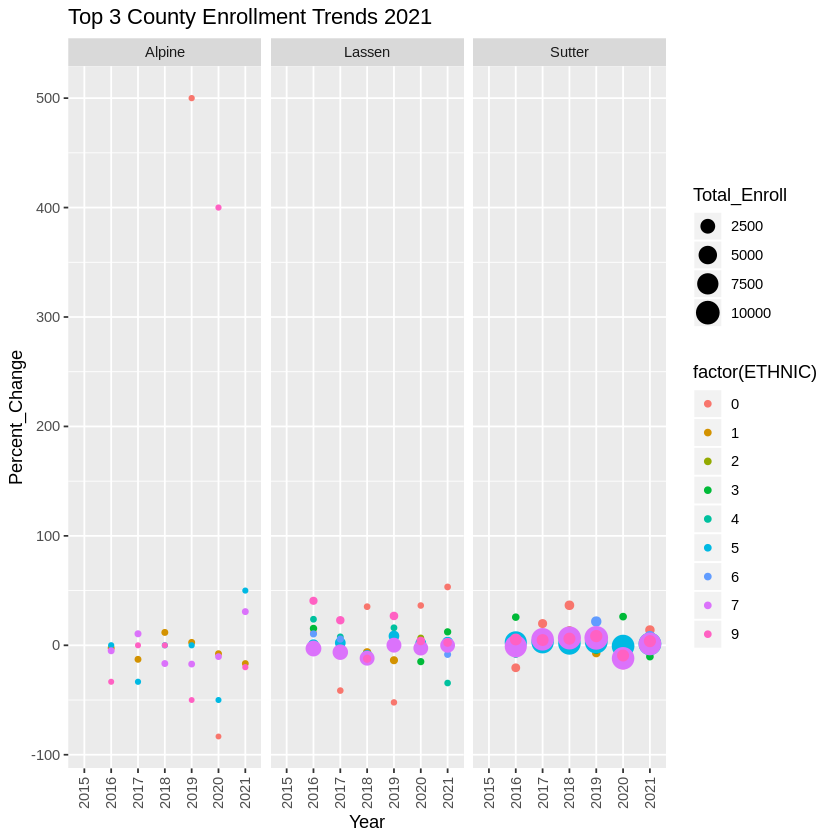

In [13]:
#Plot 2021 County Changes Over Time including factoring in enrollment total and ethnicity

ggplot(county_top3_21, aes(Year, Percent_Change, color = factor(ETHNIC), size=Total_Enroll)) + 
       geom_point() + ggtitle('Top 3 County Enrollment Trends 2021') + facet_wrap(~COUNTY) + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


We can observe from the above plot that there are two outliers within Alpine county - ethnicity groups 0 and 9 with rather drasticc percent changes in enrollment.

Alpine county also has much smaller enrollment total v. Sutter and Lassen (with Sutter having the largest enrollment of several different ethnic groups), making it more easily impacted by fluctuation in enrollment total.

Warning message:
“Removed 7 rows containing missing values (position_stack).”

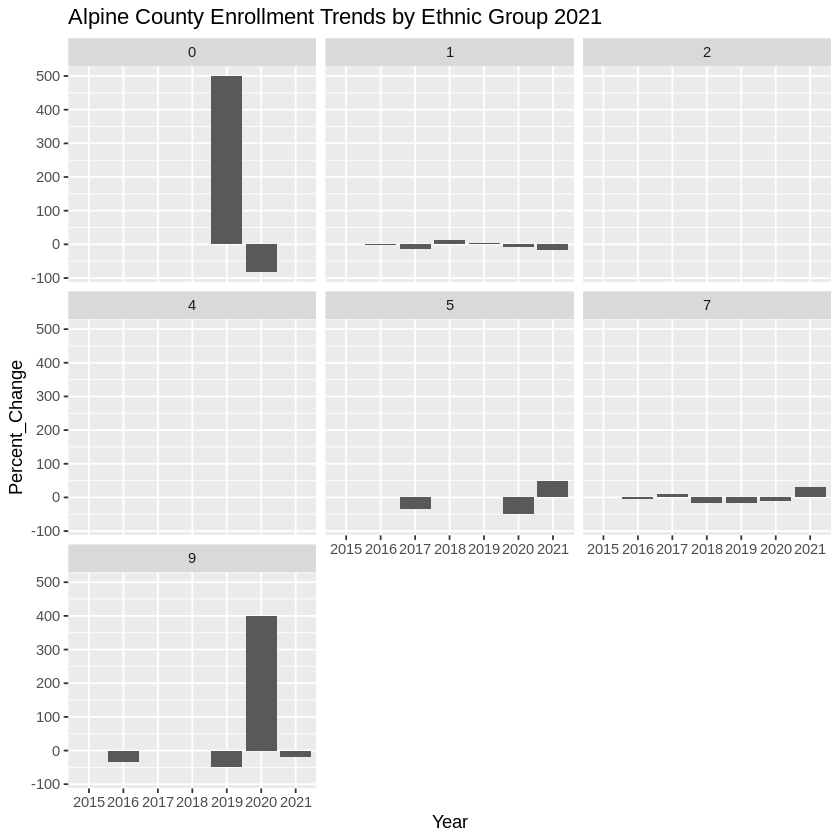

In [14]:
#Alpine county graph
ggplot(county_top21_alpine, aes(Year, Percent_Change)) + 
       geom_bar(stat='identity') + ggtitle('Alpine County Enrollment Trends by Ethnic Group 2021') + 
        facet_wrap(~ETHNIC)

Alpine County is a smaller county with enrollment at about 75 Median income ~$63,750 (2019), 8.7% in poverty located in Eastern CA

COVID-19 precautions(https://www.alpinecoe.k12.ca.us/District/88-Untitled.html): Cancelled all in person classes by Tuesday, March 17th Packet based instruction as primary method d/t rural base lacking internet Technology via chromebook for distance learning for older grades?

Warning message:
“Removed 9 rows containing missing values (position_stack).”

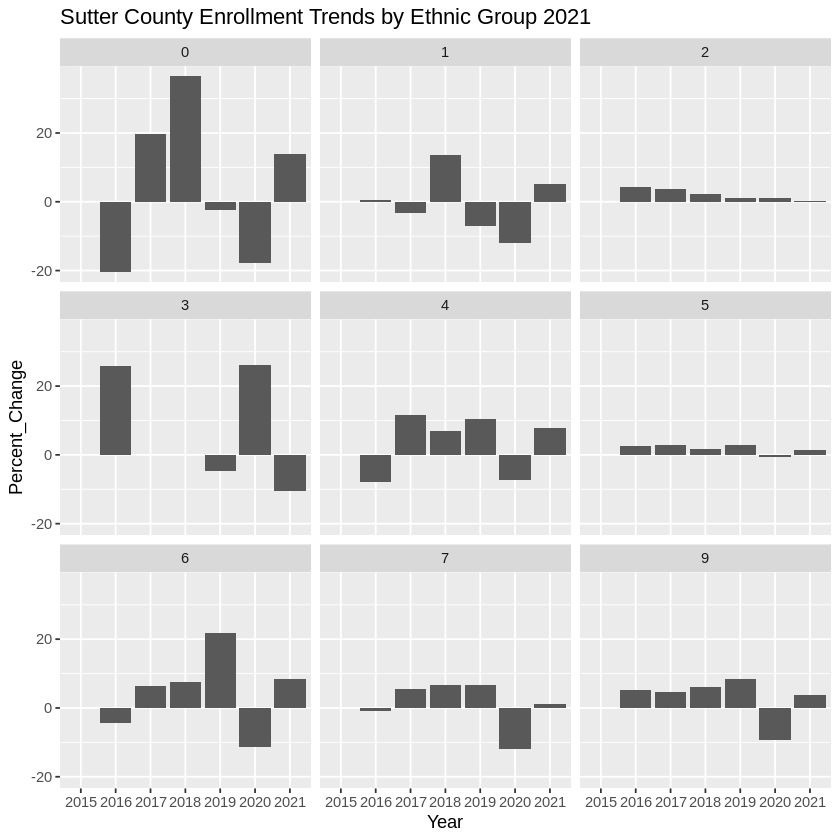

In [15]:
#Sutter county graph
ggplot(county_top21_sutter, aes(Year, Percent_Change)) + 
       geom_bar(stat='identity') + ggtitle('Sutter County Enrollment Trends by Ethnic Group 2021') + 
        facet_wrap(~ETHNIC)

Sutter County is a larger county with enrollment at about 22-23k Median income: ~$59,050 (2019), 13.3% in poverty located in North of Sacramento

COVID-19 precautions(https://www.sutter.k12.ca.us/COVID-19/index.html): Cancelled all in person classes by Tuesday, March 17th Cancelled all in person classes by Tuesday, March 17th Provided packets and/or tech based academic support and Chromebooks to anyone who indicated a need for it Communicated mental health support and nutritional supports to families Continued with distance learning for 2020-2021 school year Superintendent of Schools COVID-19 Prevention Program – Jan 22 2021

Warning message:
“Removed 9 rows containing missing values (position_stack).”

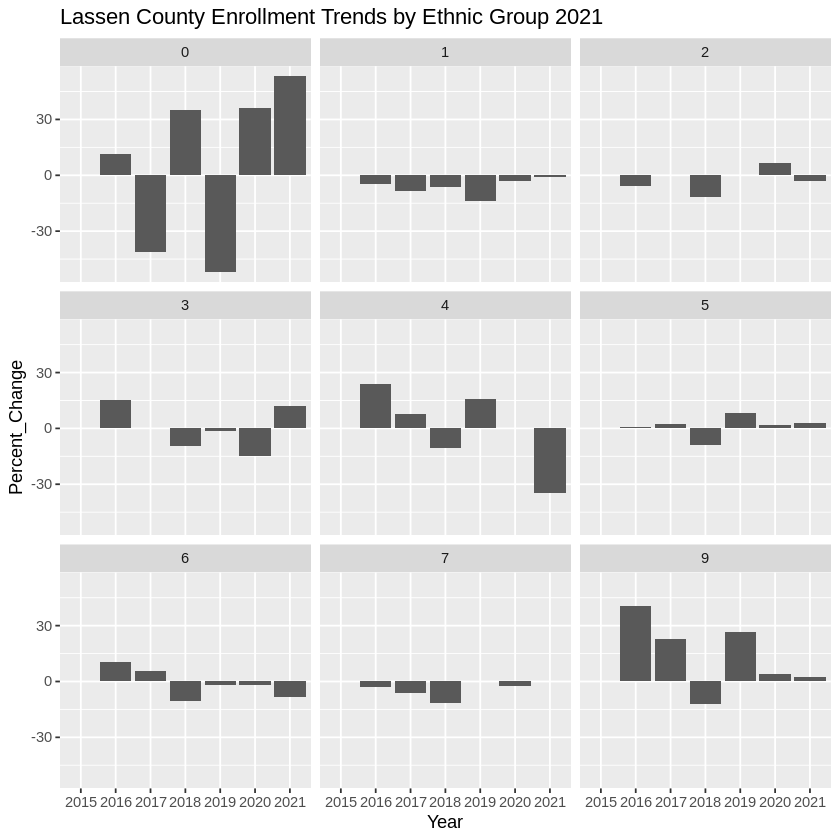

In [16]:
#Lassen county graph
ggplot(county_top21_lassen, aes(Year, Percent_Change)) + 
       geom_bar(stat='identity') + ggtitle('Lassen County Enrollment Trends by Ethnic Group 2021') + 
        facet_wrap(~ETHNIC)

Lassen County is a smaller sized county with enrollment at about 3-4k Median income: $56,352 (2019), 10% in poverty located in NE CA

# Bottom 3 Counties by Percentage Change in 2021

In [17]:
#In addition to understanding the counties where there was positive enrollment during the pandemic, we also want
#to understand what took place in the bottom three districts with negative enrollment during the pandemic.

# County Bottom 3 Changes in 2021 - Filter for these specific counties to show trends over time (2015-2021)

cnty_bottom3 <- df %>%
select(COUNTY, Year, ENR_TOTAL) %>%
group_by(COUNTY, Year) %>%
summarize(Total_Enroll = sum(ENR_TOTAL)) %>%
mutate(Percent_Change = (Total_Enroll/lag(Total_Enroll)-1)*100) 

#filter by the bottom three districts in terms of having the greatest percentage decline in enrollment during 2021

cnty_21_bottom3 <- filter(cnty_bottom3, COUNTY == 'Mono' | COUNTY == 'Inyo' | COUNTY == 'Sierra')
cnty_21_bottom3

COUNTY,Year,Total_Enroll,Percent_Change
<fct>,<fct>,<int>,<dbl>
Inyo,2015,5194,NA
Inyo,2016,4698,-9.54948017
Inyo,2017,4550,-3.15027671
Inyo,2018,4497,-1.16483516
Inyo,2019,4496,-0.02223705
Inyo,2020,4476,-0.44483986
Inyo,2021,4059,-9.31635389
Mono,2015,2111,NA
Mono,2016,2081,-1.42112743


geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
Warning message:
“Removed 3 rows containing missing values (position_stack).”

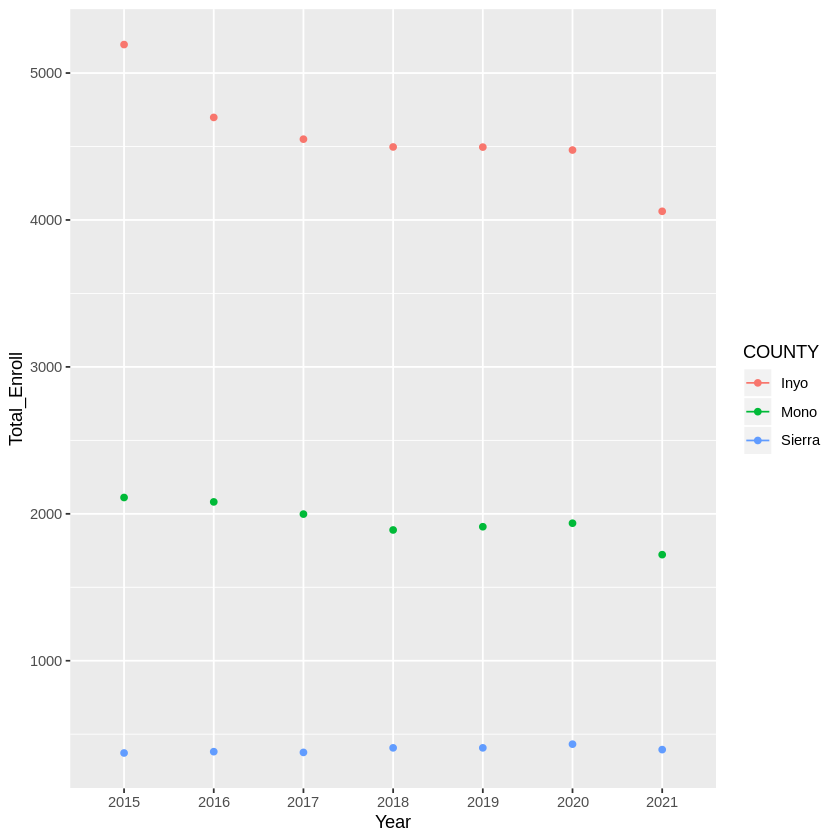

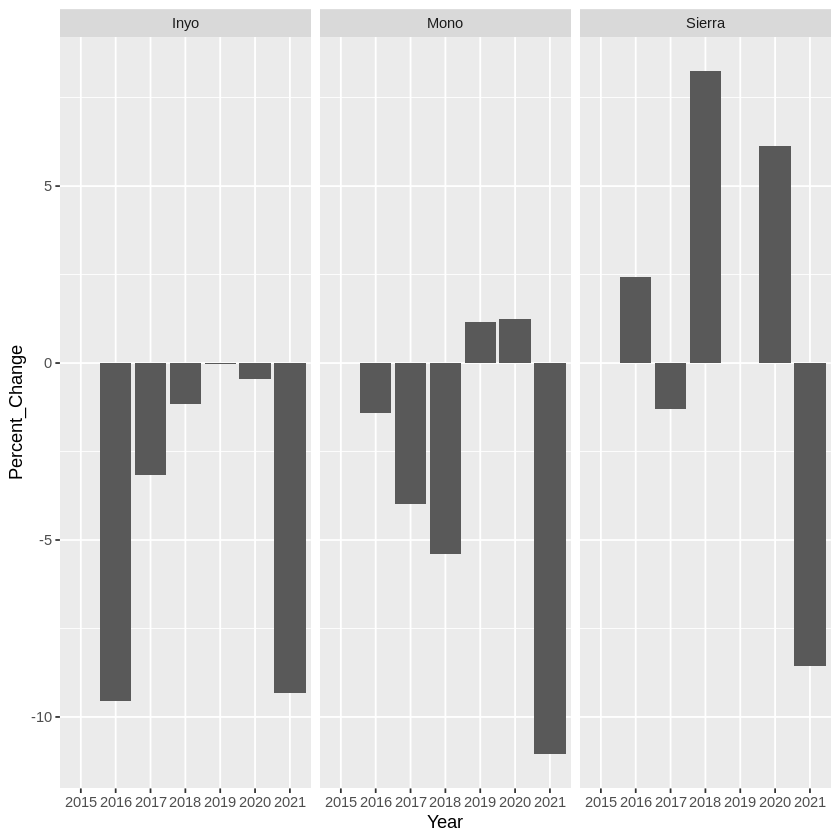

In [18]:
#Plot Bottom 3 Counties by Percentage Change 2016-2021

ggplot(cnty_21_bottom3, aes(Year, Total_Enroll, color = COUNTY)) + 
       geom_point() + geom_line()

ggplot(cnty_21_bottom3, aes(Year, Percent_Change)) + 
       geom_bar(stat='identity') + facet_wrap(~COUNTY)

From the charts above it's clear that the three districts had Inyo and Mono counties have had negative percentage change in
enrollment in the past. This was not the case for Sierra county where enrollment actually had increased in the years prior
to the pandemic. Across all three districts however there was negative percentage change in enrollment for 2021.

### Description of demographic factors in Inyo, Mono, and Sierra counties

Inyo County is in the eastern Central part of California. In 2010 the county population was 18,546. . $35,006 was the median household income according to the 2000 Census. Schools closed for in-learning on April 2, 2020. https://inyocoe.org/wp-content/uploads/2020/03/Board-Resolution-2020-03-School-ClosuresGraduation-Promotion-.pdf https://inyocoe.org/2020/03/16/corona-virus-public-announcement/ According to the county education website multiple schools began the school year with a distance learning only model while one district did offer in-person learning as an option.

Mono County is in the eastern Central part of California. In 2010 the county population was 14, 2020. It has the fifth-lowest population in California. The median income for a household in 2000 was $44,992. The school district closed schools on March 13, 2020 and reopened in August of 2020 for distance learning only. https://4.files.edl.io/62a4/01/30/21/210812-cb3d07e6-4470-4881-af0c-4ffcab7cd96a.pdf https://coronavirus.monocounty.ca.gov/pages/reopening https://www.mammothusd.org/

Sierra County is in northeastern part of California on the borer with Nevada. The 2010 census indicates that the population was 3,240. It has the second lowest population by county after Alpine County. The median income for a household was $35,827 in the 2000 Census. According to the School District Facebook account it seems like schools closed on March 17th. Distance learning was implemented April 17th. Were planning for in-person learning and then had to switch to distance learning because they were put on the state watchlist. Distance learning began September 8, 2020. On-Campus instruction scheduled for October 12th 2020. Had to transition back to distance learning on November 9, 2020 because of a confirmed postive case. https://www.facebook.com/spjusd/

### Inyo County

In [19]:
##To understand whether specific schools and ethnic group of the students might have played a role in the negative % change
##in enrollment for these three counties, we will explore each county in depth.

##Filter for data only on Inyo County schools and sum total enrollment
#Also create another variable that is the percentage change in enrollment total across years 
##Save this data into a new dataframe 
cnty_inyo <- df  %>% 
filter(COUNTY == 'Inyo')  %>% 
group_by(SCHOOL, Year)  %>% 
summarize(Total_Enroll = sum(ENR_TOTAL)) %>%
mutate(Percent_Change = (Total_Enroll/lag(Total_Enroll)-1)*100)


In [20]:
#Because we want to specifically look at the percentage change for 2020 and 2021, filter the data by Year == 2021.
#Save this into a new 2021-specific dataframe.
cnty_inyo_2021_pc <- cnty_inyo  %>% 
filter(Year == 2021)
head(cnty_inyo_2021_pc)

SCHOOL,Year,Total_Enroll,Percent_Change
<fct>,<fct>,<int>,<dbl>
Big Pine Elementary,2021,113,-2.586207
Big Pine High,2021,42,27.272727
Bishop Elementary,2021,829,-11.431624
Bishop Independent Study,2021,13,-13.333333
Bishop Union High,2021,629,7.890223
College Bridge Academy,2021,255,-12.969283


geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


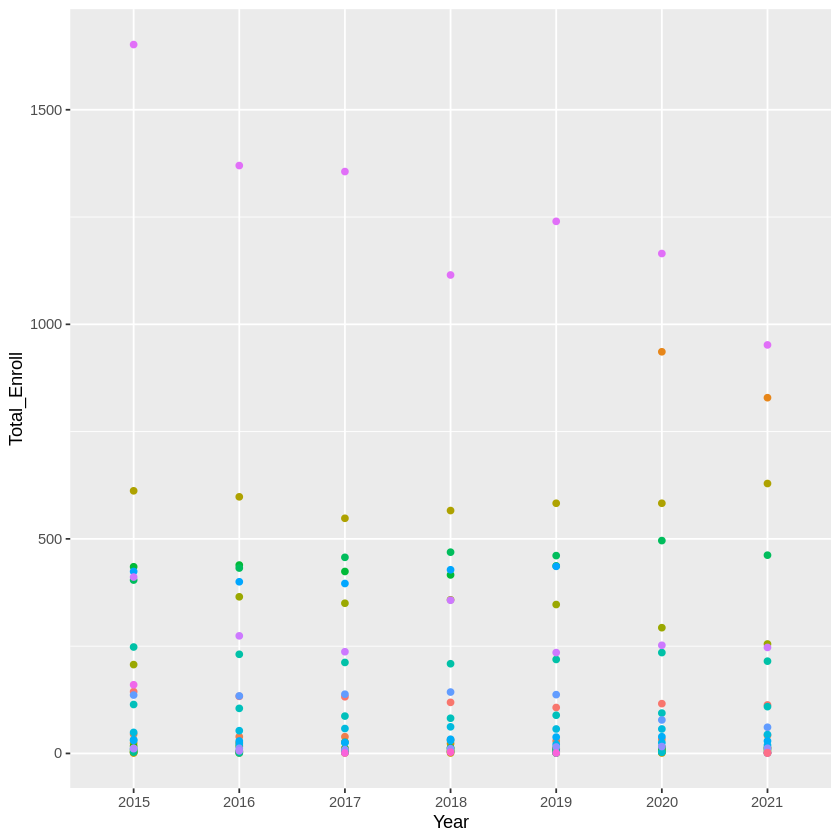

In [21]:
#Plot Schools in Inyo County to show the total enrollment across time (2015-2021)

ggplot(cnty_inyo, aes(Year, Total_Enroll, color = SCHOOL)) + 
       geom_point() + geom_line() + theme(legend.position = "none") 

##It seems that across most of the schools in Inyo county that total enrollment fell in 2021

In [22]:
##To explore the role that ethnic group for students might have played we create a new dataframe that contains all data 
##on schools in Inyo County

cnty_inyo_all <- df  %>% 
filter(COUNTY == 'Inyo')

In [24]:
##Now we group by year and ethnic group and create a new variable in which enrollment totals for ethnic groups
##are added together across each year.
##This is saved to a new dataframe
Inyo_Ethnic_Total = cnty_inyo_all %>%                                        
  group_by(Year, ETHNIC) %>%  
  summarise(total = sum(ENR_TOTAL))



In [25]:
head(Inyo_Ethnic_Total)

Year,ETHNIC,total
<fct>,<int>,<int>
2015,0,40
2015,1,460
2015,2,48
2015,3,6
2015,4,8
2015,5,2861


geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


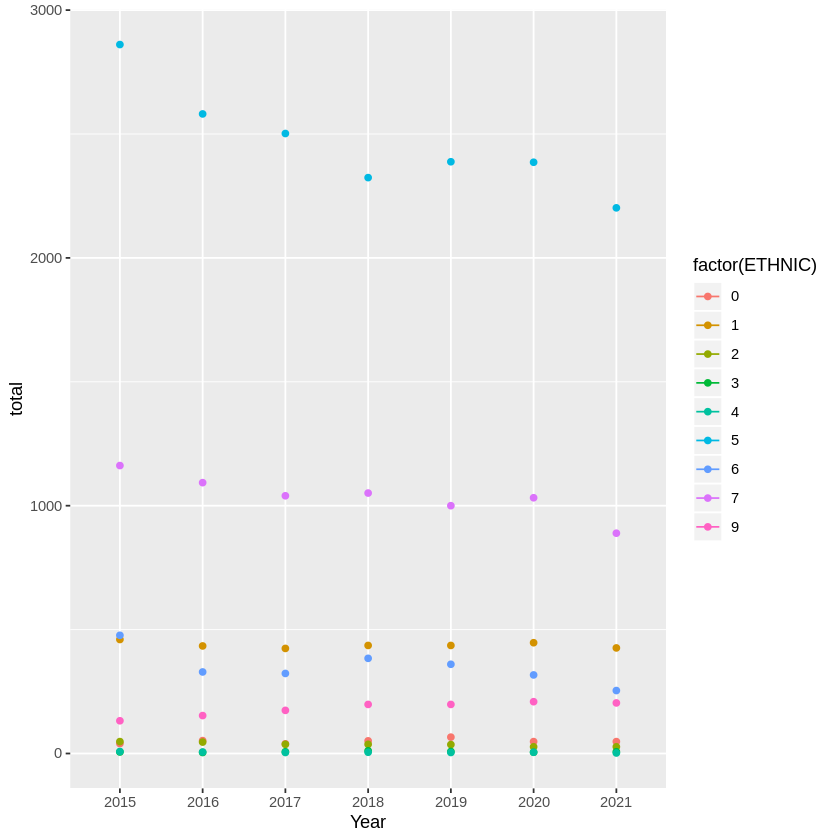

In [26]:
##A plot is created to display change in ethnic group enrollment totals across time (2015-2021)
## From the graph it appears that African American and White students in Inyo county had the greatest declines in
##enrollment for 2021
ggplot(Inyo_Ethnic_Total, aes(Year, total, color=factor(ETHNIC))) + geom_point() + geom_line()

In [27]:
##It will also be helpful to visualize the percent change in enrollment by ethnicity across 2015-2021 in Inyo county. 
##We group the Inyo County ethnic group data by ethnic group and create a new variable that will show the percent
##change in enrollment for each ethnic group by year
##This is saved to a new dataframe

Inyo_Ethnic_Total_2 <- Inyo_Ethnic_Total  %>% 
group_by(ETHNIC)  %>% 
mutate(Percent_Change = (total/lag(total)-1)*100)

Warning message:
“Removed 9 rows containing missing values (position_stack).”

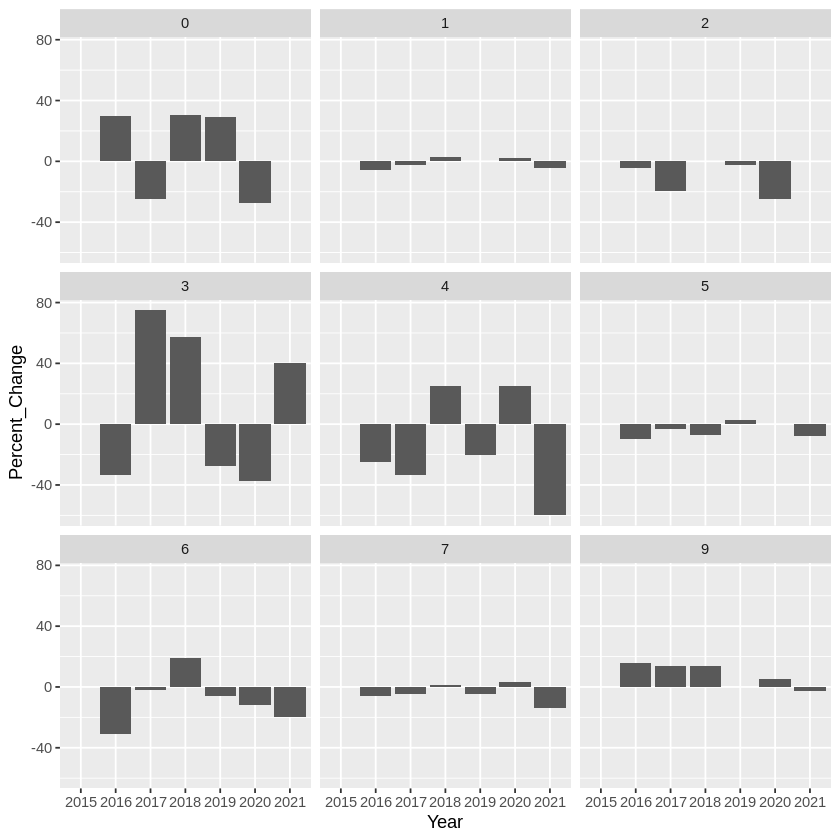

In [28]:
##The percent change by year for each ethnic group in Inyo County is plotted. 
##From the graph it is apparent that Filipino student enrollment had the greatest % decline in enrollment 2021 for 2021,
##followed by Asian, Not Hispanic. Pacific Islander, Not Hispanic was actually the only group in 2021 to have a positive
##increase in % enrollment for the year.

ggplot(Inyo_Ethnic_Total_2, aes(Year, Percent_Change)) + 
       geom_bar(stat='identity') + facet_wrap(~ETHNIC)

### Mono County

In [29]:
##Filter for data only on Mono County schools and sum total enrollment
#Also create another variable that is the percentage change in enrollment total across years 
##Save this data into a new dataframe 

cnty_mono <- df  %>% 
filter(COUNTY == 'Mono')  %>% 
group_by(SCHOOL, Year)  %>% 
summarize(Total_Enroll = sum(ENR_TOTAL)) %>%
mutate(Percent_Change = (Total_Enroll/lag(Total_Enroll)-1)*100)

In [30]:
#Because we want to specifically look at the percentage change for 2020 and 2021, filter the data by Year == 2021.
#Save this into a new 2021-specific dataframe.
cnty_mono_2021_pc <- cnty_mono  %>% 
filter(Year == 2021)
head(cnty_mono_2021_pc)

SCHOOL,Year,Total_Enroll,Percent_Change
<fct>,<fct>,<int>,<dbl>
Antelope Elementary,2021,130,-11.564626
Bridgeport Elementary,2021,46,-14.814815
Coleville High,2021,72,5.882353
Edna Beaman Elementary,2021,14,-22.222222
Jan Work Community,2021,7,16.666667
Lee Vining Elementary,2021,89,-6.315789


geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


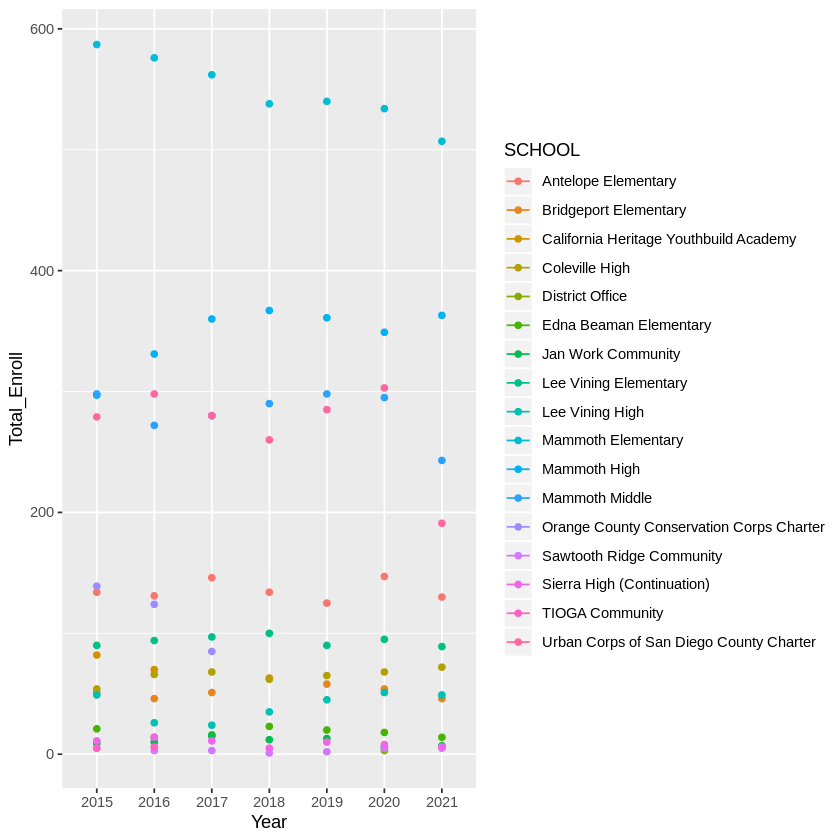

In [31]:
#Plot Schools in Mono County to show the total enrollment across time (2015-2021)

ggplot(cnty_mono, aes(Year, Total_Enroll, color = SCHOOL)) + 
       geom_point() + geom_line()

##It seems that across most of the schools in Mono county that enrollment fell in 2021. However,
##two schools, Mammoth and Coleville High actually had increased student enrollment for the year.

In [32]:
##To explore the role that ethnic group for students might have played we create a new dataframe that contains all data 
##on schools in Mono County

cnty_mono_all <- df  %>% 
filter(COUNTY == 'Mono')

In [34]:
##Now we group by year and ethnic group and create a new variable in which enrollment totals for ethnic groups
##are added together across each year.
##This is saved to a new dataframe

Mono_Ethnic_Total = cnty_mono_all %>%                                        
  group_by(Year, ETHNIC) %>%  
  summarise(total = sum(ENR_TOTAL)) 

In [35]:
head(Mono_Ethnic_Total)

Year,ETHNIC,total
<fct>,<int>,<int>
2015,0,3
2015,1,48
2015,2,36
2015,3,8
2015,4,7
2015,5,1089


geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


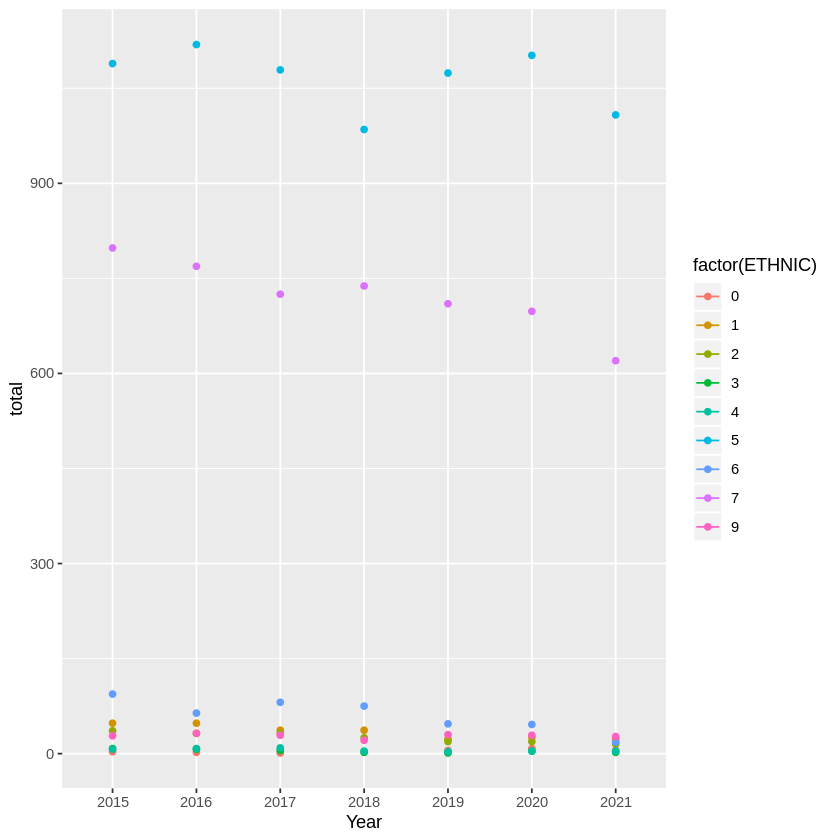

In [36]:
##A plot is created to display change in ethnic group enrollment totals across time (2015-2021)
## From the graph it appears that all ethnic groups across students declined in enrollment for 2021

ggplot(Mono_Ethnic_Total, aes(Year, total, color=factor(ETHNIC))) + geom_point() + geom_line()

In [37]:
##It will also be helpful to visualize the percent change in enrollment by ethnicity across 2015-2021 in Mono county. 
##We group the Mono County ethnic group data by ethnic group and create a new variable that will show the percent
##change in enrollment for each ethnic group by year
##This is saved to a new dataframe

Mono_Ethnic_Total_2 <- Mono_Ethnic_Total  %>% 
group_by(ETHNIC)  %>% 
mutate(Percent_Change = (total/lag(total)-1)*100)

Warning message:
“Removed 9 rows containing missing values (position_stack).”

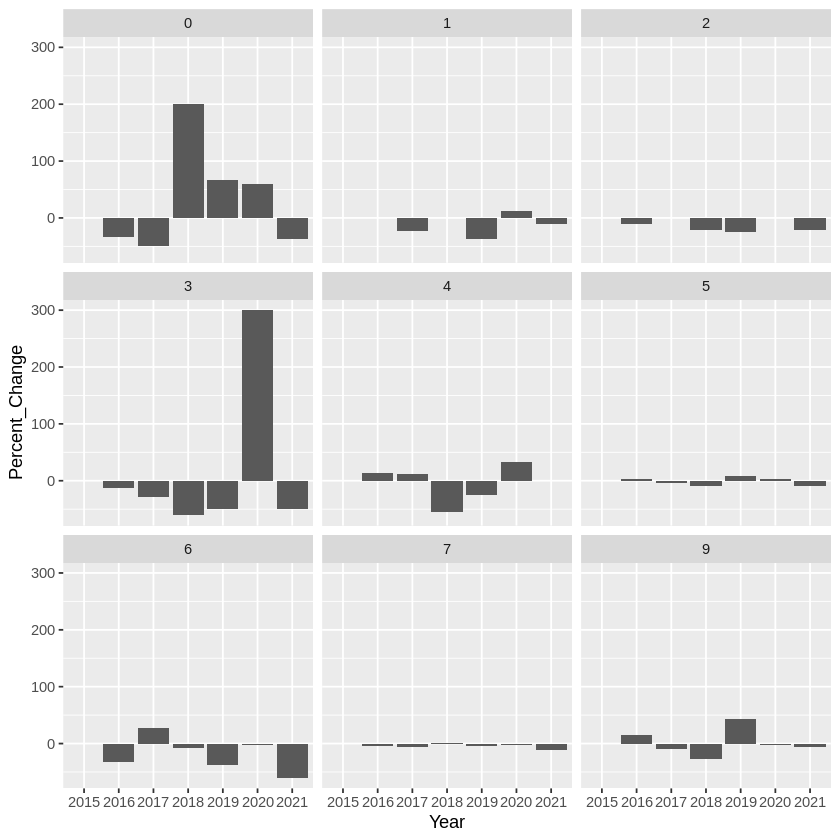

In [38]:
##The percent change by year for each ethnic group in Mono County is plotted. 
##From the graph it is apparent that Pacific Islander, Not Hispanic and African American student enrollment had the greatest % decline in enrollment 2021 for 2021,
##negative % change in enrollment for 2021.

ggplot(Mono_Ethnic_Total_2, aes(Year, Percent_Change)) + 
       geom_bar(stat='identity') + facet_wrap(~ETHNIC)

### Sierra County

In [39]:
##Filter for data only on Sierra County schools and sum total enrollment
#Also create another variable that is the percentage change in enrollment total across years 
##Save this data into a new dataframe 

cnty_sierra <- df  %>% 
filter(COUNTY == 'Sierra')  %>% 
group_by(SCHOOL, Year)  %>% 
summarize(Total_Enroll = sum(ENR_TOTAL)) %>%
mutate(Percent_Change = (Total_Enroll/lag(Total_Enroll)-1)*100)

In [40]:
#Because we want to specifically look at the percentage change for 2020 and 2021, filter the data by Year == 2021.
#Save this into a new 2021-specific dataframe.
cnty_sierra_2021_pc <- cnty_sierra  %>% 
filter(Year == 2021)
cnty_sierra_2021_pc

SCHOOL,Year,Total_Enroll,Percent_Change
<fct>,<fct>,<int>,<dbl>
Downieville Elementary,2021,21,-32.258065
Downieville Junior-Senior High,2021,29,3.571429
Loyalton Elementary,2021,183,-7.106599
Loyalton High,2021,158,-10.227273
Sierra Pass (Continuation),2021,4,100.000000


geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


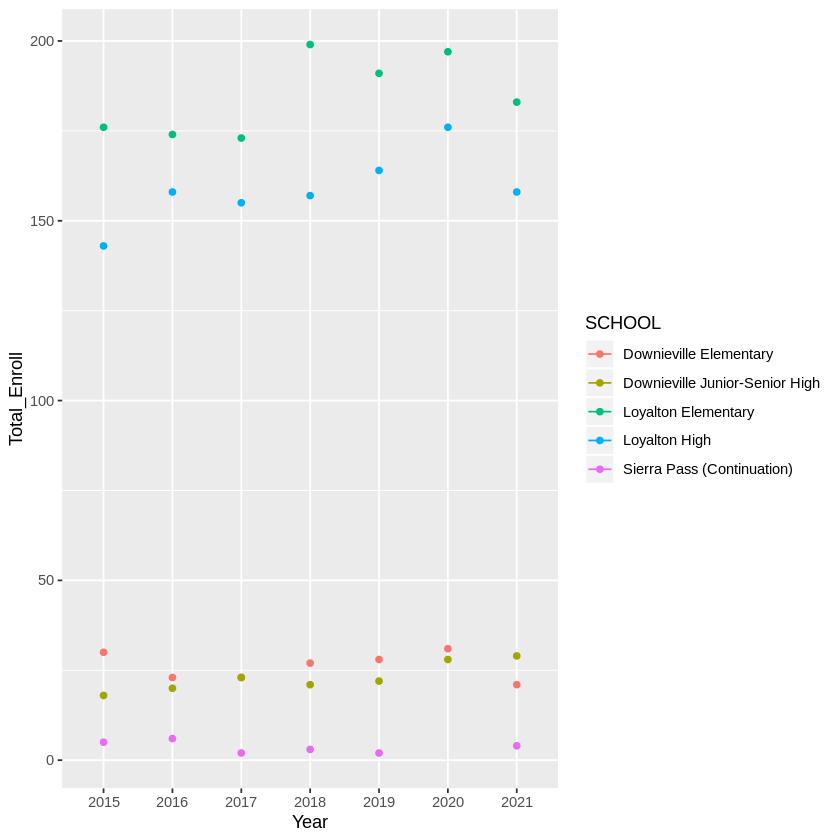

In [41]:
#Plot Schools in Sierra County to show the total enrollment across time (2015-2021)

ggplot(cnty_sierra, aes(Year, Total_Enroll, color = SCHOOL)) + 
       geom_point() + geom_line()

##It seems that across most of the schools in Sierra county that enrollment fell in 2021. However,
##one school, Sierra Pass (Continuation) actually had increased student enrollment for the year.

In [42]:
##To explore the role that ethnic group for students might have played we create a new dataframe that contains all data 
##on schools in Sierra County
cnty_sierra_all <- df  %>% 
filter(COUNTY == 'Sierra')

In [44]:
##Now we group by year and ethnic group and create a new variable in which enrollment totals for ethnic groups
##are added together across each year.
##This is saved to a new dataframe

Sierra_Ethnic_Total = cnty_sierra_all %>%                                        
  group_by(Year, ETHNIC) %>%  
  summarise(total = sum(ENR_TOTAL)) 

In [45]:
head(Sierra_Ethnic_Total)

Year,ETHNIC,total
<fct>,<int>,<int>
2015,0,17
2015,2,2
2015,5,57
2015,6,2
2015,7,289
2015,9,5


geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


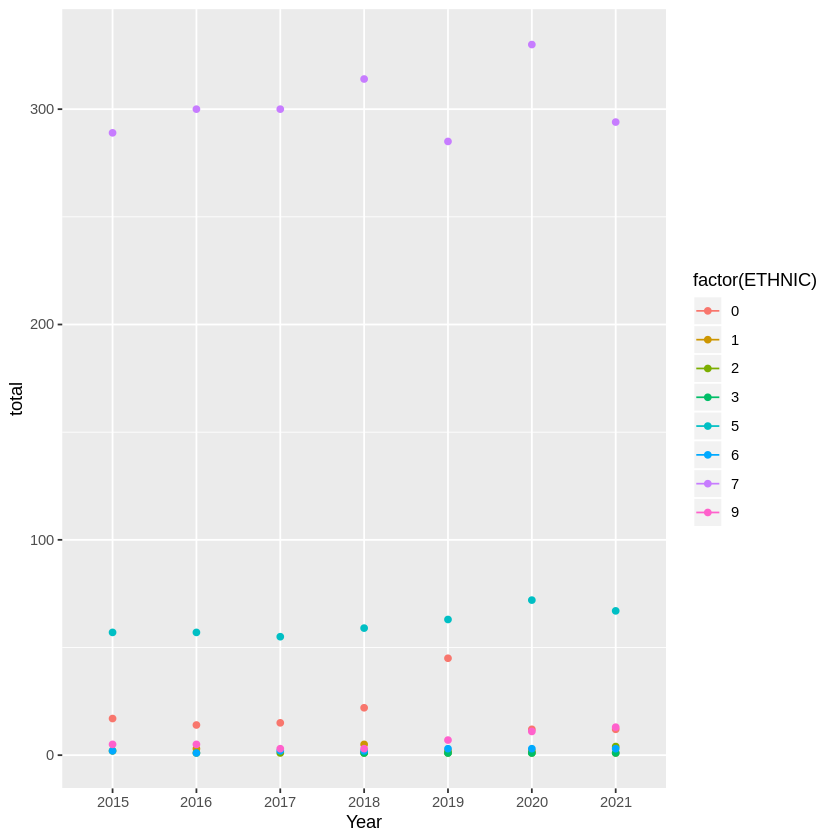

In [46]:
##A plot is created to display change in ethnic group enrollment totals across time (2015-2021)
## From the graph it appears that most ethnic groups across students declined in enrollment for 2021,
## However, for Two or More Races, Not Hispanic, and American Indian/Alaskan Native students enrollment increased.

ggplot(Sierra_Ethnic_Total, aes(Year, total, color=factor(ETHNIC))) + geom_point() + geom_line()

In [47]:
##It will also be helpful to visualize the percent change in enrollment by ethnicity across 2015-2021 in Sierra county. 
##We group the Sierra County ethnic group data by ethnic group and create a new variable that will show the percent
##change in enrollment for each ethnic group by year
##This is saved to a new dataframe

Sierra_Ethnic_Total_2 <- Sierra_Ethnic_Total  %>% 
group_by(ETHNIC)  %>% 
mutate(Percent_Change = (total/lag(total)-1)*100)

Warning message:
“Removed 8 rows containing missing values (position_stack).”

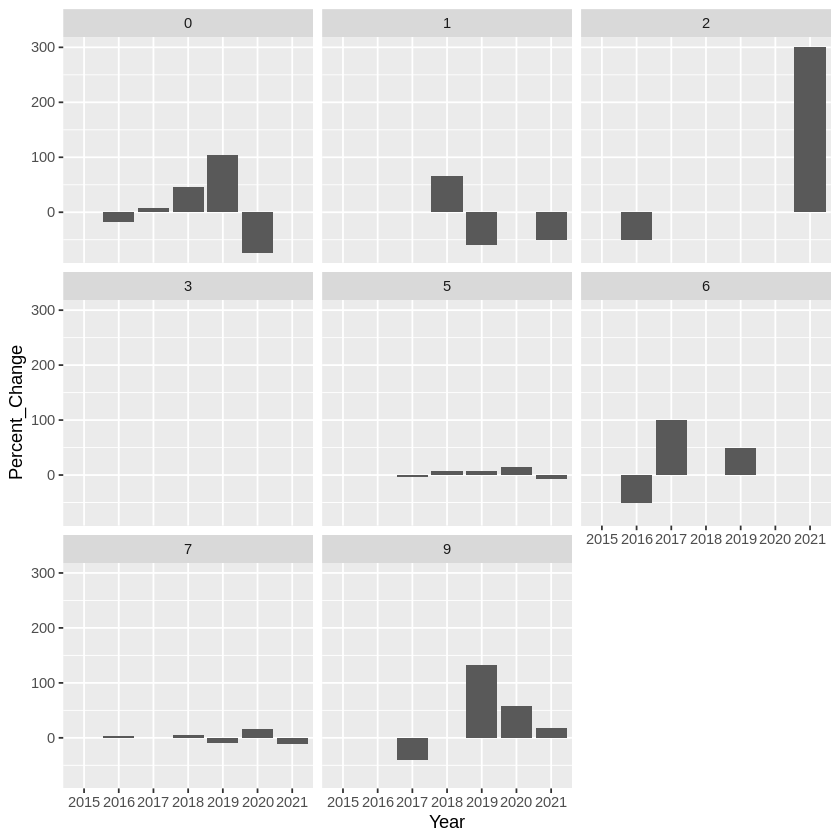

In [48]:
##The percent change by year for each ethnic group in Sierra County is plotted. 
##From the graph it is apparent that there is missing data for several ethnic groups across 2015-2021. For those 
##ethnic groups that do have enrollment data available, American Indian/Native Alaskan student enrollment had the 
##greatest negative % change in 2021. Asian, Not Hispanic Students actually had a large % increase for the 2020-2021 school
##year.

ggplot(Sierra_Ethnic_Total_2, aes(Year, Percent_Change)) + 
       geom_bar(stat='identity') + facet_wrap(~ETHNIC)

The school district and county breakdowns in enrollmment percentage change can be used for additional examination. Perhaps by exploring school closure and reopening data, as well as COVID restrictions, we can understand why some schools had changes in enrollments compared to others.

In [49]:
head(county_total)

COUNTY,Year,total_enroll,percent_change
<fct>,<fct>,<int>,<dbl>
Alameda,2015,224966,NA
Alameda,2016,225925,0.4262866
Alameda,2017,226904,0.4333296
Alameda,2018,228356,0.6399182
Alameda,2019,228125,-0.1011578
Alameda,2020,227331,-0.3480548


In [50]:
#Save our dataframe to an Rda file
saveRDS(df,file="Group7DataFrame.Rda")

In [51]:
#Save county total 2021 dataframe to an Rda file for use in another notebook
saveRDS(county_total_2021,file="county_total_2021.Rda")